In [1]:

import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
                    

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data=np.array(data)

In [4]:
np.random.shuffle(data)

In [5]:
m,n=data.shape

In [6]:
data_dev=data[:1000].T

In [7]:
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev=X_dev/255.

In [8]:
print(Y_dev.shape)
print(X_dev.shape)

(1000,)
(784, 1000)


In [9]:
data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train=X_train/255
_,m_train=X_train.shape

In [10]:
def init_parameters():
    w1=np.random.rand(10,784)-0.5
    w2=np.random.rand(10,10)-0.5
    b1=np.random.rand(10,1)-0.5
    b2=np.random.rand(10,1)-0.5
    return w1,b1,w2,b2

def ReLU(a): return np.maximum(a,0)
def softmax(a): return np.exp(a)/sum(np.exp(a))

def forward_propagation(w1,b1,w2,b2,inp):
    z1=w1.dot(inp)+b1
    a1=ReLU(z1)
    z2=w2.dot(a1)+b2
    a2=softmax(z2)
    return z1,a1,z2,a2

def one_hot(x):
    oh=np.zeros((x.size,x.max()+1))
    oh[np.arange(x.size),x]=1
    oh=oh.T
    return oh
def deri_relu(x):return x>0

def back_prop(z1,a1,z2,a2,w2,x,y):
    y=one_hot(y)
    dz2=a2-y
    dw2=1/m*dz2.dot(a1.T)
    db2=1/m*np.sum(dz2)
    dz1=w2.T.dot(dz2)*(deri_relu(z1))
    dw1=1/m*dz1.dot(x.T)
    db1=1/m*np.sum(dz1)
    return dw1,db1,dw2,db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1=w1-alpha*dw1
    b1=b1-alpha*db1    
    w2=w2-alpha*dw2  
    b2=b2-alpha*db2    
    return w1,b1,w2,b2



In [11]:
def get_pred(x):
    return np.argmax(x,0)

def get_correctness(pred, y):
    print(pred,y)
    return np.sum(pred == y)/y.size

def gradient_descent(x,y,alpha,it):
    w1,b1,w2,b2=init_parameters()
    for i in range(it):
        z1,a1,z2,a2=forward_propagation(w1,b1,w2,b2,x)
        dW1,db1,dw2,db2=back_prop(z1,a1,z2,a2,w2,x,y)
        w1,b1,w2,b2=update_params(w1,b1,w2,b2,dW1,db1,dw2,db2,alpha)
        if i%10==0:
            print("Iteration: ",i)
            predictions=get_pred(a2)
            print(get_correctness(predictions, y))
    return w1,b1,w2,b2

In [12]:
w1,b1,w2,b2=gradient_descent(X_train,Y_train,0.10,1000)


Iteration:  0
[8 0 9 ... 9 5 8] [3 9 4 ... 0 9 6]
0.08446341463414635
Iteration:  10
[7 7 0 ... 9 0 8] [3 9 4 ... 0 9 6]
0.1626829268292683
Iteration:  20
[7 7 0 ... 0 0 2] [3 9 4 ... 0 9 6]
0.2330487804878049
Iteration:  30
[8 4 0 ... 0 0 2] [3 9 4 ... 0 9 6]
0.2952682926829268
Iteration:  40
[8 9 4 ... 0 9 2] [3 9 4 ... 0 9 6]
0.35492682926829267
Iteration:  50
[8 9 4 ... 0 9 2] [3 9 4 ... 0 9 6]
0.4100731707317073
Iteration:  60
[8 9 4 ... 0 9 2] [3 9 4 ... 0 9 6]
0.4528048780487805
Iteration:  70
[8 9 4 ... 0 9 2] [3 9 4 ... 0 9 6]
0.487390243902439
Iteration:  80
[8 9 4 ... 0 9 2] [3 9 4 ... 0 9 6]
0.5170243902439025
Iteration:  90
[8 9 4 ... 0 9 2] [3 9 4 ... 0 9 6]
0.5463170731707317
Iteration:  100
[8 9 4 ... 0 9 2] [3 9 4 ... 0 9 6]
0.5740243902439024
Iteration:  110
[8 9 4 ... 0 9 2] [3 9 4 ... 0 9 6]
0.599609756097561
Iteration:  120
[8 9 4 ... 0 9 8] [3 9 4 ... 0 9 6]
0.6220243902439024
Iteration:  130
[8 9 4 ... 0 9 8] [3 9 4 ... 0 9 6]
0.6412682926829268
Iteration:  140
[

In [13]:
def make_predictions(X,w1,b1,w2,b2):
    _,_,_,a2=forward_propagation(w1,b1,w2,b2,X)
    pred=get_pred(a2)
    return pred

def test_prediction(index,w1,b1,w2,b2):
    current_image=X_train[:,index, None]
    prediction=make_predictions(X_train[:, index, None], w1, b1, w2, b2)
    label=Y_train[index]
    print("Prediction: ",prediction)
    print("Label: ",label)
    
    current_image=current_image.reshape((28, 28))-255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


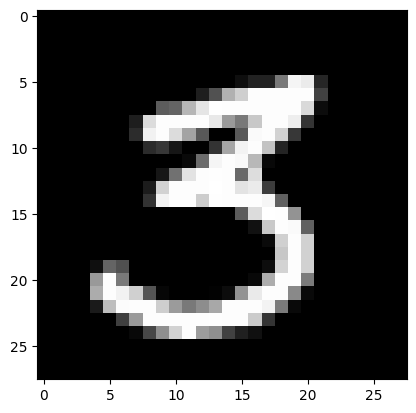

Prediction:  [9]
Label:  9


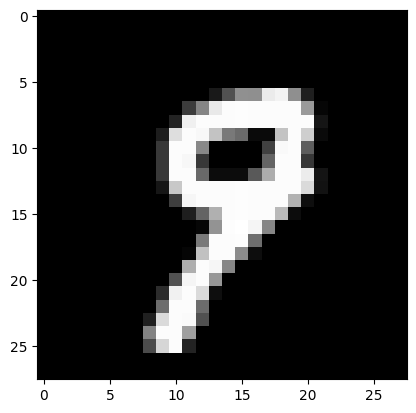

Prediction:  [4]
Label:  4


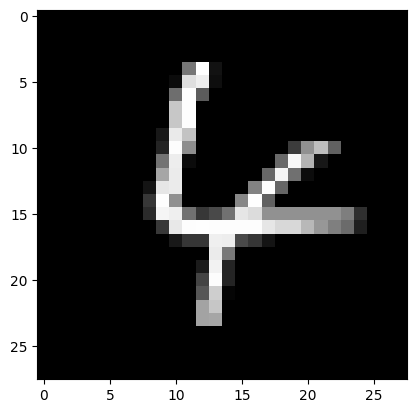

Prediction:  [7]
Label:  7


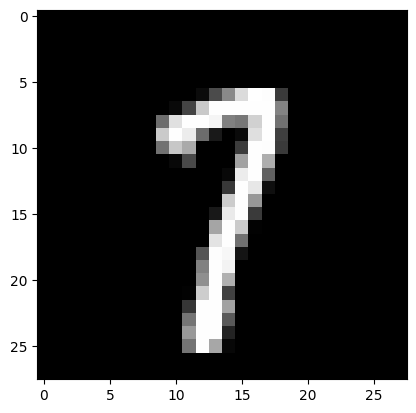

In [14]:
test_prediction(0, w1, b1, w2, b2)
test_prediction(1, w1, b1, w2, b2)
test_prediction(2, w1, b1, w2, b2)
test_prediction(3, w1, b1, w2, b2)

In [15]:
dev_predictions = make_predictions(X_dev,w1,b1,w2,b2)
get_correctness(dev_predictions,Y_dev)

[2 7 1 8 7 0 9 2 3 2 2 1 3 5 0 2 7 8 4 2 0 5 0 5 8 0 7 1 6 9 2 9 3 5 2 7 1
 1 0 2 0 0 1 4 9 7 8 0 2 2 8 9 7 0 1 2 8 5 7 6 2 7 3 8 2 6 2 3 7 1 3 5 8 3
 4 8 6 7 7 0 8 4 8 4 3 1 8 7 1 2 8 9 1 8 7 2 2 6 1 4 4 4 0 4 1 2 3 8 2 1 0
 6 8 0 5 7 1 8 9 2 3 9 0 2 2 5 0 3 5 9 2 6 6 4 4 2 4 9 2 5 7 5 8 0 6 4 1 7
 2 2 0 8 1 0 3 6 2 1 2 0 1 5 0 1 7 4 1 9 1 1 7 6 1 2 9 7 8 7 6 7 8 0 3 0 7
 2 2 5 6 7 7 5 3 5 3 0 1 3 4 6 0 6 5 4 3 9 8 0 3 9 8 0 4 0 3 4 6 7 6 8 0 3
 0 9 0 1 9 0 9 1 4 7 4 2 5 3 3 5 6 3 5 9 0 4 3 7 6 6 5 2 2 3 9 9 3 6 6 3 4
 7 3 2 0 8 6 3 3 0 1 4 8 4 8 7 4 5 0 1 5 7 1 1 6 3 9 8 6 7 0 5 5 7 4 9 8 1
 7 2 9 1 4 5 1 6 9 9 2 7 2 7 7 7 0 6 7 3 5 1 6 9 2 4 2 7 0 1 0 2 6 8 2 4 2
 3 0 4 8 7 1 1 9 5 1 6 9 2 4 3 5 6 2 6 9 1 5 9 5 1 4 1 3 6 7 5 6 3 4 7 3 8
 4 3 8 8 7 0 2 7 5 5 2 7 9 4 0 8 3 9 8 3 7 6 8 9 1 6 9 1 7 9 3 8 8 0 2 2 5
 1 0 6 3 3 7 9 3 1 6 3 2 2 0 8 6 7 0 3 3 2 0 4 4 6 4 0 6 5 1 2 2 7 0 9 7 2
 0 9 3 6 0 2 6 7 6 0 1 7 8 0 7 2 7 4 3 7 9 8 9 8 9 6 6 0 3 8 6 4 5 7 1 2 9
 4 2 8 5 7 3 1 0 9 4 5 0 

0.878